In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
X = data.iloc[:, [3,4]].values

In [ ]:
data.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df= data.describe().loc['mean']
df

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
Name: mean, dtype: float64

1.Mean Age of the cusomers is 38.85

2.Mean Annual Income 60.56 $

3.Mean Spening Score is 50.20

In [ ]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

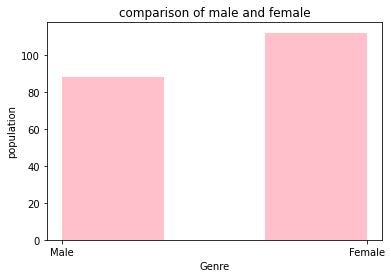

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Genre, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Genre')
plt.ylabel('population')
plt.show()

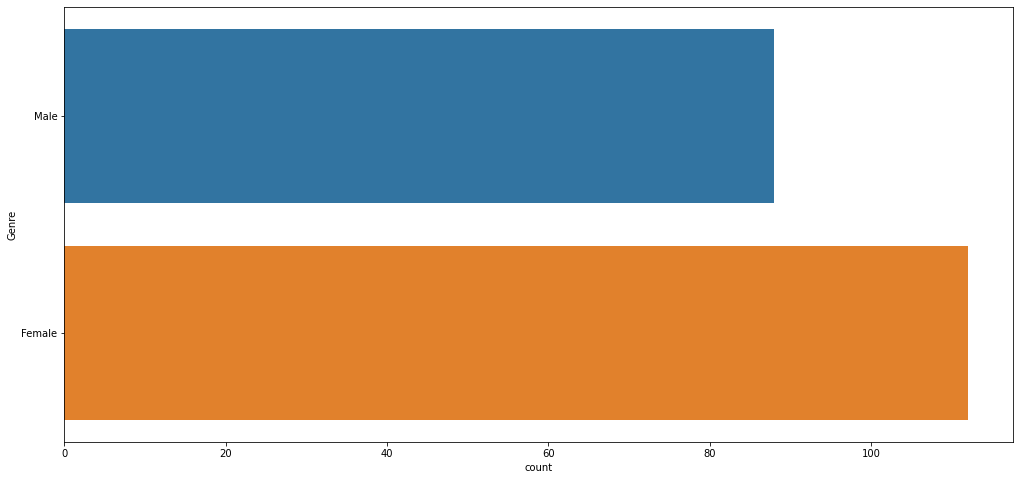

In [ ]:
plt.figure(1 , figsize = (17 , 8))
sns.countplot(y = 'Genre' , data = data)
plt.show()

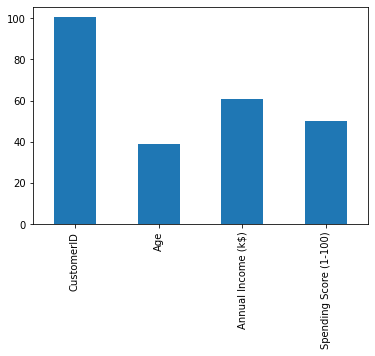

In [ ]:
data.describe().loc['mean'].plot.bar()

Mean of custmer if is not important as te value doesnt have any signifance.

This plot would be very useful to compare he features which have same units.

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

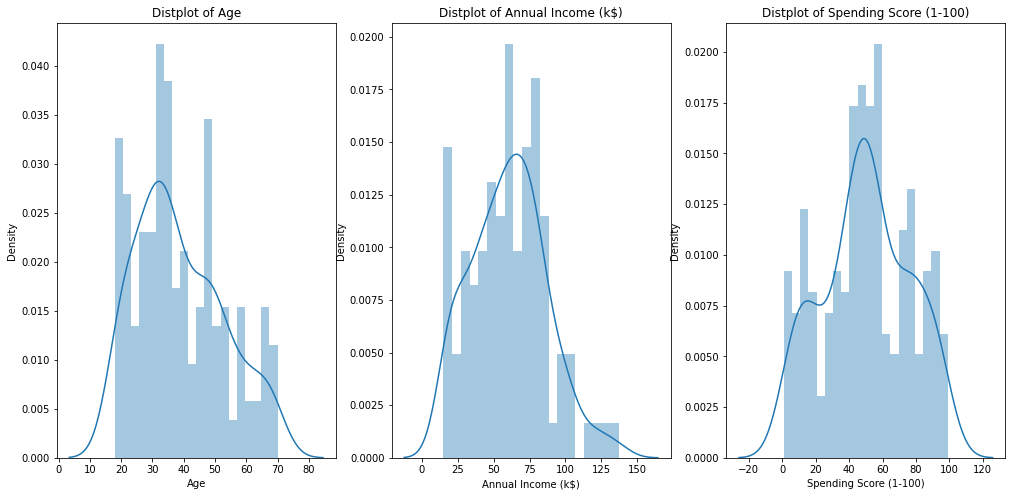

In [ ]:
plt.figure(1 , figsize = (17 , 8))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
data['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

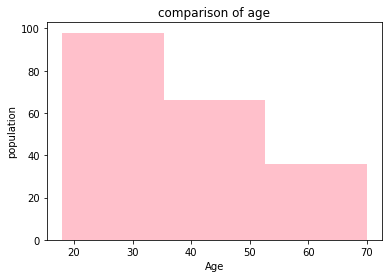

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Age, bins = 3, color = 'pink')
plt.title('comparison of age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [ ]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
#Let's predict the x
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)
#We convert our prediction to dataframe so we can easily see this prediction in table form
df_pred = pd.DataFrame(y_kmeans)
df_pred.head()

[1 4 7 4 1 4 7 4 7 4 7 4 7 4 7 4 1 4 1 4 1 4 7 4 7 4 1 4 1 4 7 4 7 4 7 4 7
 4 1 4 1 4 1 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 2 6 6 2 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 5 2 0 3 5 3 5 2 5 3 0 3 5 3 5 3 0 2 0 3 0 2 5
 3 0 3 0 3 5 3 0 3 5 3 5 2 0 3 0 3 5 3 0 3 5 3 5 3 0 3 0 3 5 3 0 3 0 3 0 3
 0 3 8 3 8 3 8 9 8 9 8 9 8 9 8]


,0
0,1
1,4
2,7
3,4
4,1


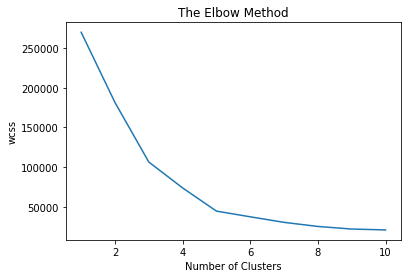

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss') #Within-Cluster-Sum-of-Squares
plt.show()


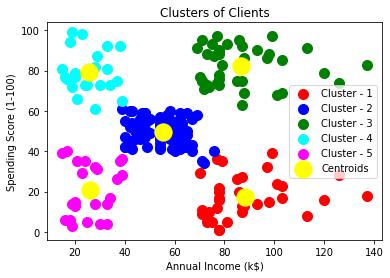

In [ ]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster - 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster - 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster - 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster - 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster - 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
print(y_kmeans)
#We convert our prediction to dataframe so we can easily see this prediction in table form
df_pred = pd.DataFrame(y_kmeans)
df_pred.head()

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


,0
0,4
1,3
2,4
3,3
4,4


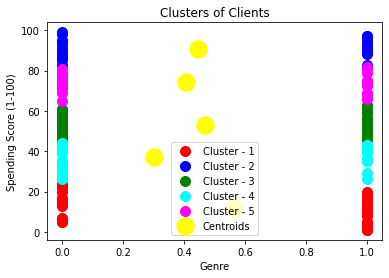

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [1,4]].values
X
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# print(X)

# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster - 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster - 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster - 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster - 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s = 100, c = 'magenta', label = 'Cluster - 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()